In [2]:
%run signal_model_utilities.py.py
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
import matplotlib.pyplot as plt

In [2]:
def fft_norm(N, fsamp):
    "Factor to normalize FFT to ASD units"
    return np.sqrt(2 / (N * fsamp))
scale = np.sqrt(2)*fft_norm(5000, 5000)

In [18]:
pos,force= load_file(5e-6,0,5e-6)

Your choice of separation or height is not existing
Taking 2.4e-06 for bead_size
Taking 5.0e-06 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 5.01e-06 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 5.00e-06 is selected
A height of 8.47e-21 is selected


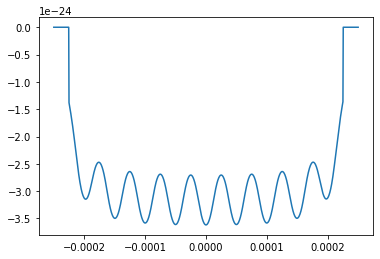

In [19]:
plt.plot(pos,force[0])

Your choice of separation or height is not existing
Taking 2.4e-06 for bead_size
Taking 5.0e-06 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 5.01e-06 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 5.00e-06 is selected
A height of 8.47e-21 is selected


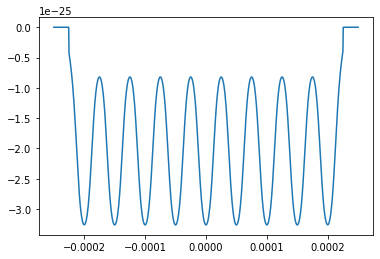

In [20]:
pos,force = force_vs_position(5e-6,0,"x",5e-6)
plt.plot(pos,force)

In [21]:
def get_force(dist=11.4, lamb=100):
    freqs_signal = 3*np.arange(1,22)
    z_sep = -10
    y_offset = 4.9
    test = force_vs_time(dist*1e-6,z_sep*1e-6,200e-6,3,"z",lamb*1e-6, yuk_or_grav="yuk",offset_y=y_offset*1e-6, 
                         alpha=1e8, bead_size=3.8e-6)
    scale = np.sqrt(2)*fft_norm(5000, 5000)
    x = np.array(list(test[1])*1)*1.85/1.55
    fft = np.abs(np.fft.rfft(x))*scale
    angles = np.angle(np.fft.rfft(x))
    freq = np.fft.rfftfreq(len(x), d=1./5000)
    forces_tmp = np.array([fft[freq==freq_] for freq_ in freqs_signal])
    return forces_tmp
def get_force_distances(lamb=100):
    forces = []
    for dist_ in np.arange(1,20, 0.1):
        forces.append(get_force(dist=dist_, lamb=lamb))
    return forces

In [33]:
fff = np.array(get_force_distances(lamb=100))
fff2 = np.array(get_force_distances(lamb=3))



Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.00e-06 is selected
A height of -1.00e-05 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.0e-06 for separation
Taking -1.0e-05 for height
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.00e-06 is selected
A height of -1.00e-05 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.0e-06 for separation
Taking -1.0e-05 for height
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06

In [4]:
plt.plot(fff[2])

NameError: name 'fff' is not defined

[Text(0.5, 0, 'distance [$\\mu m$]'), Text(0.5, 1.0, 'Z Force, lambda=100 um')]

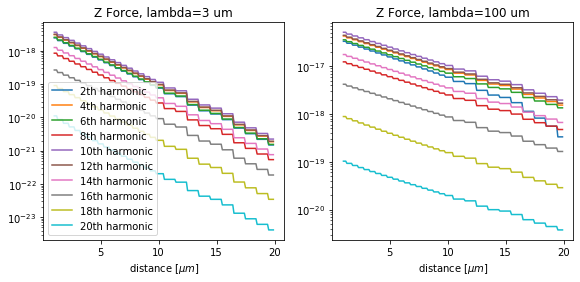

In [36]:
_, ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True)
[ax[0].semilogy(np.arange(1,20, 0.1), fff2[:,i], label=str(i+1)+'th harmonic') for i in range(1,21)[::2]]
[ax[1].semilogy(np.arange(1,20, 0.1), fff[:,i], label=str(i+1)+'th harmonic') for i in range(1,21)[::2]]

ax[0].legend()

ax[0].set(xlabel='distance [$\mu m$]', title='Z Force, lambda=3 um')
ax[1].set(xlabel='distance [$\mu m$]', title='Z Force, lambda=100 um')

In [4]:
def build_mod_grav_funcs(theory_data_dir):
    '''Loads data from the output of /data/grav_sim_data/process_data.py
       which processes the raw simulation output from the farmshare code

       INPUTS: theory_data_dir, path to the directory containing the data

       OUTPUTS: gfuncs, 3 element list with 3D interpolating functions
                        for regular gravity [fx, fy, fz]
                yukfuncs, 3 x Nlambda array with 3D interpolating function
                          for modified gravity with indexing: 
                          [[y0_fx, y1_fx, ...], [y0_fy, ...], [y0_fz, ...]]
                lambdas, np.array with all lambdas from the simulation
    '''

    ### Load modified gravity curves from simulation output
    Gdata = np.load(theory_data_dir + 'Gravdata.npy')
    yukdata = np.load(theory_data_dir + 'yukdata.npy')
    lambdas = np.load(theory_data_dir + 'lambdas.npy')
    xpos = np.load(theory_data_dir + 'xpos.npy')
    ypos = np.load(theory_data_dir + 'ypos.npy')
    zpos = np.load(theory_data_dir + 'zpos.npy')
    
    if lambdas[-1] > lambdas[0]:
        lambdas = lambdas[::-1]
        yukdata = np.flip(yukdata, 0)

    ### Find limits to avoid out of range erros in interpolation
    xlim = (np.min(xpos), np.max(xpos))
    ylim = (np.min(ypos), np.max(ypos))
    zlim = (np.min(zpos), np.max(zpos))

    # print('Lims')
    # print(xlim)
    # print(ylim)
    # print(zlim)

    ### Build interpolating functions for regular gravity
    gfuncs = [0,0,0]
    for resp in [0,1,2]:
        gfuncs[resp] = interp.RegularGridInterpolator((xpos, ypos, zpos), Gdata[:,:,:,resp])

    ### Build interpolating functions for yukawa-modified gravity
    yukfuncs = [[],[],[]]
    for resp in [0,1,2]:
        for lambind, yuklambda in enumerate(lambdas):
            lamb_func = interp.RegularGridInterpolator((xpos, ypos, zpos), yukdata[lambind,:,:,:,resp])
            yukfuncs[resp].append(lamb_func)
    lims = [xlim, ylim, zlim]

    outdic = {'gfuncs': gfuncs, 'yukfuncs': yukfuncs, 'lambdas': lambdas, 'lims': lims}
    return xpos,outdic

In [5]:
start = time.time()
x,mgf = build_mod_grav_funcs("/data/new_trap/simulation/results/4_6um-gbead_1um-unit-cells/")
end = time.time()
print (end-start)
print(mgf.keys())

0.6198582649230957
dict_keys(['gfuncs', 'yukfuncs', 'lambdas', 'lims'])


In [6]:
yukfuncs = mgf['yukfuncs']
lambdas = mgf['lambdas']

In [7]:
resp_dict = {0: 'X', 1: 'Y', 2: 'Z'}


In [9]:
mindrive = -100
maxdrive = 100
npos = 100
posvec = 1e-6 * np.linspace(mindrive, maxdrive, npos)
ax0pos = 15
ax1pos = -5

In [10]:
xpos = 8
height = 10


# print(np.min(drivevec), np.max(drivevec), np.min(posvec), np.max(posvec))

ones = np.ones_like(posvec)

In [11]:
pts = np.stack((xpos*ones, posvec, height*ones), axis=-1)


In [15]:
mgf["lims"]

[(4.319999999999999e-06, 3.1320000000000005e-05),
 (-0.0002495, 0.0002495),
 (-2e-05, 2.0000000000000022e-05)]

In [8]:
import os

In [9]:
filename = "/data/new_trap/test/test123.txt"


In [15]:
test123 = os.path.dirname(filename)

In [26]:
try:os.makedirs(os.path.dirname(filename))
except: print("mimi")

In [27]:
"/data/new_trap/test/"

'/data/new_trap/test/'

In [35]:
testx,testy,testz =[[] for x in range(3)]
for lambind, yuklambda in enumerate(lambdas):
    print(lambind)
    for resp in [0,1,2]:
        yukforce = yukfuncs[resp][lambind](pts*1.0e-6)
        yukforce_func = interp.interp1d(posvec, yukforce)
        if(resp==0):testx.append(yukforce_func)
        if(resp==0):testy.append(yukforce_func)
        if(resp==0):testz.append(yukforce_func)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [65]:
plot_test = []
for i in np.arange(1e-6,100e-6,1e-6):
    plot_test.append(testx[0](i))

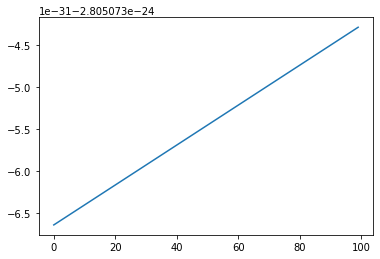

In [66]:
plt.plot(plot_test)

In [42]:
testy[0](1e-6)

array(-2.80507366e-24)

In [3]:
import sys
sys.path.append("/home/analysis_user/opt_lev_analysis/lib/")

In [4]:
sys.path

['/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '',
 '/home/analysis_user/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/home/analysis_user/.ipython',
 '/home/analysis_user/opt_lev_analysis/lib/']

In [1]:
import dill as pickle
import numpy as np
import matplotlib.pyplot as plt
import grav_util_3 as gu
import bead_util as bu

plt.rcParams.update({'font.size': 14})

import warnings
warnings.filterwarnings("ignore")

ncore = 20
# ncore = 1



bs_ff = [int(i) for i in str(bead_size) if i.isdigit()]
yuklambda = 100.0e-6

# seps = [9.0]
seps = [9.0, 9.1, 9.2, 9.3, 9.4, 19.5]

# heights = [6.0]
heights = np.linspace(-10.0, 0.0, 21)

posvec = np.linspace(-249.5, 249.0, 501)

gfuncs_class = gu.GravFuncs(theory_data_dir)




#####################################################################
#####################################################################
####################################################################
lambind = np.argmin(np.abs(gfuncs_class.lambdas - yuklambda))
sep_fig, sep_axarr = plt.subplots(3, 1, sharex=True, sharey=True, \
                                        figsize=(8,8))
height_fig, height_axarr = plt.subplots(3, 1, sharex=True, sharey=True, \
                                        figsize=(8,8))

minsep = np.min(seps)

colors = bu.get_color_map(len(seps), cmap='plasma')
for sepind, sep in enumerate(seps):

    ones = np.ones_like(posvec)
    pts = np.stack((sep*ones, posvec, 6.0*ones), axis=-1)
    for resp in [0,1,2]:
        yukforce = gfuncs_class.yukfuncs[resp][lambind](pts*1.0e-6)
        sep_axarr[resp].plot(posvec, yukforce, color=colors[sepind], \
                                label='$\\Delta x = {:0.1f}$ um'.format(sep))

ax_dict = {0: 'X', 1: 'Y', 2: 'Z'}
for resp in [0,1,2]:
    sep_axarr[resp].set_ylabel('{:s} Force [N]'.format(ax_dict[resp]))
sep_axarr[-1].set_xlabel('Position Along Density Modulation [um]')

sep_axarr[1].legend(fontsize=10,ncol=2)
sep_axarr[0].set_title('Yukawa-modified gravity for $\\alpha = 1$, $\\lambda = {:0.1f}$ um'\
                                .format(yuklambda*1e6), fontsize=14)
sep_fig.tight_layout()





colors = bu.get_color_map(len(heights), cmap='coolwarm')
for heightind, height in enumerate(heights):

    ones = np.ones_like(posvec)
    pts = np.stack((minsep*ones, posvec, height*ones), axis=-1)

    for resp in [0,1,2]:

        yukforce = gfuncs_class.yukfuncs[resp][lambind](pts*1.0e-6)

        height_axarr[resp].plot(posvec, yukforce, color=colors[heightind], \
                                label='$\\Delta z = {:0.1f}$ um'.format(height))

ax_dict = {0: 'X', 1: 'Y', 2: 'Z'}
for resp in [0,1,2]:
    height_axarr[resp].set_ylabel('{:s} Force [N]'.format(ax_dict[resp]))
height_axarr[-1].set_xlabel('Position Along Density Modulation [um]')

height_axarr[1].legend(fontsize=10,ncol=2)
height_axarr[0]
height_fig.tight_layout()






plt.show()








ModuleNotFoundError: No module named 'grav_util_3'

In [82]:
def force_from_interpolation(x_sep,height_sep,lambind,axis="X"):
    lambind = np.argmin(np.abs(gfuncs_class.lambdas - yuklambda))
    ax_dict = {'X':0, 'Y':1, 'Z':2}
    ones = np.ones_like(posvec)
    pts = np.stack((x_sep*ones, posvec, height_sep*ones), axis=-1)
    for resp in [0,1,2]:
        yukforce = gfuncs_class.yukfuncs[ax_dict[axis]][lambind](pts*1.0e-6)
    return yukforce

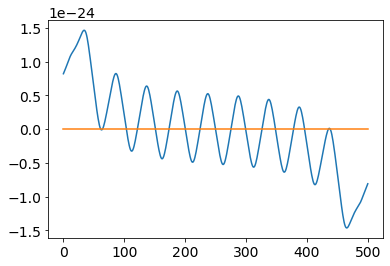

In [92]:
plt.plot(force_from_interpolation(5,0,5,axis="Y"))
plt.plot(force_from_interpolation(5,0,5,axis="Z"))

In [79]:
ax_dict = {'X':0, 'Y':1, 'Z':2}


In [1]:
from signal_model_utilities_v2 import *
p,f = force_from_interpolation(7.6,5,10,5,axis="z")

NameError: name 'force_from_interpolation' is not defined

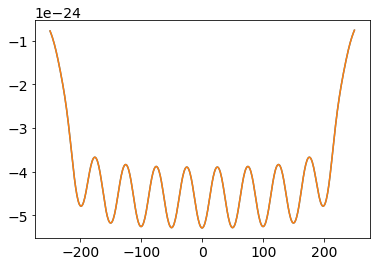

In [6]:
plt.plot(p,f)#force_from_interpolation(7.6,5,10,5,axis="Z"))


In [3]:
bead_size = 4.6
theory_data_dir = "/data/new_trap/simulation/results/um-gbead_1um_unit_cells/"


In [1]:
theory_data_dir

NameError: name 'theory_data_dir' is not defined

In [15]:
import sys
sys.path.append("/home/analysis_user/opt_lev_analysis/lib/")
import numpy as np
import grav_util_3 as gu
import matplotlib.pyplot as plt



def force_from_interpolation(bead_size,x_sep,height_sep,lambda_val,axis="X",posvec=np.linspace(-249.5, 249.0, 501)):
    yuklambda = lambda_val
    bs_ff = [int(i) for i in str(bead_size) if i.isdigit()]
    theory_data_dir = "/data/new_trap/simulation/results/%d_%dum-gbead_1um_unit_cells/" %(bs_ff[0],bs_ff[1])
    gfuncs_class = gu.GravFuncs(theory_data_dir)
    lambind = np.argmin(np.abs(gfuncs_class.lambdas - yuklambda))
    ax_dict = {'X':0, 'Y':1, 'Z':2}
    ones = np.ones_like(posvec)
    pts = np.stack((x_sep*ones, posvec, height_sep*ones), axis=-1)
    for resp in [0,1,2]:
        yukforce = gfuncs_class.yukfuncs[ax_dict[axis]][lambind](pts*1.0e-6)
    return posvec,yukforce

# sine
def position_at_time_sin_function(stroke,time,frequency,offset_y=0): 
    '''
    get the position for a given frequency and stroke using a pure sine wave. Included an offset in the y direction. 0 is the center of the attractor, which is center of the central gold finger
    '''
    pos_at_time = stroke/2*np.sin(2*np.pi*time*frequency)+offset_y
    return pos_at_time

# triang
def position_at_time_tri_function(stroke,time,frequency,width=0.5):
    '''
    get the position for a given frequency and stroke using a sawtooth wave. Included an offset in the y direction. 0 is the center of the attractor, which is center of the central gold finger    
    '''
    pos_at_time=stroke/2*signal.sawtooth(2 * np.pi * frequency * time+np.pi/2,width=width)
    return pos_at_time

# determine the force for a given point in time using the transformation to position

## sinusoidal movement
def force_at_a_time_sin_function(stroke,time,frequency,pos_vec,force_vec,offset_y=0):
    '''
    Interpolates between the position to get a smooth force vs time for a sine function
    '''
    osci_pos = position_at_time_sin_function(stroke,time,frequency,offset_y=offset_y)
    return np.interp(osci_pos,pos_vec,force_vec, left=None, right=None, period=None)

In [6]:
from signal_model_utilities_v2 import *
p,f = force_vs_position(5,5,100,"z")

[7, 6]
Loading Gravity Data... Done!
Loaded Yukawa Force


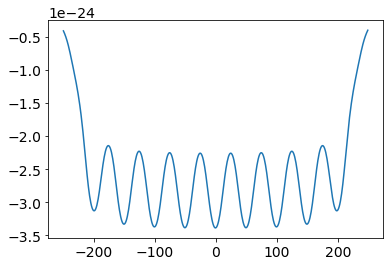

In [7]:
plt.plot(p,f)

In [4]:
from signal_model_utilities_v2 import *
t,f = force_vs_time(5,5,200,3,"z",100)

[7, 6]
Loading Gravity Data... Done!
Loaded Yukawa Force


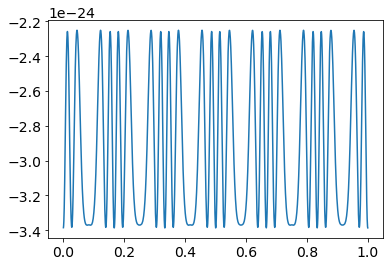

In [5]:
plt.plot(t,f)